In [1]:
!pip install keras==2.2.4
!pip install -q pydot
!pip install graphviz
!apt-get install graphviz
from keras.utils.vis_utils import plot_model

import os
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models import Word2Vec
from gensim import models
from gensim.models.keyedvectors import KeyedVectors
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import csv
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 317kB 7.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


Using TensorFlow backend.


In [5]:
from tqdm import tqdm, trange
from google.colab import files
uploaded = files.upload()

data_raw = pd.read_csv("data.csv")

print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")

data_raw.head()

Saving data.csv to data (1).csv
Number of rows in data = 4982
Number of columns in data = 11


**Sample data:**


,chosen_emotion,text_long,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,3,5,5,3,7,7,2,4,5
1,Anxiety,I am concerned that the true impact of the cur...,8,6,7,7,8,6,4,3,1
2,Relaxation,"Personally, I am fairly calm about the corona ...",4,1,1,2,2,4,7,7,2
3,Relaxation,In this very moment as I am fortunate to be ab...,6,4,2,3,4,1,6,7,3
4,Anxiety,I am more worried about getting access to my n...,6,2,2,5,5,5,4,4,4


In [6]:
#One hot encoding for all labels
data_raw
j=0
for i in data_raw.iterrows():
    if data_raw.worry[j]>=5:
        data_raw.worry[j]=1
    else:
        data_raw.worry[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anger[j]>=5:
        data_raw.anger[j]=1
    else:
        data_raw.anger[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anxiety[j]>=5:
        data_raw.anxiety[j]=1
    else:
        data_raw.anxiety[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.sadness[j]>=5:
        data_raw.sadness[j]=1
    else:
        data_raw.sadness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.desire[j]>=5:
        data_raw.desire[j]=1
    else:
        data_raw.desire[j]=0
    j=j+1

j=0
for i in data_raw.iterrows():
    if data_raw.disgust[j]>=5:
        data_raw.disgust[j]=1
    else:
        data_raw.disgust[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.fear[j]>=5:
        data_raw.fear[j]=1
    else:
        data_raw.fear[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.happiness[j]>=5:
        data_raw.happiness[j]=1
    else:
        data_raw.happiness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.relaxation[j]>=5:
        data_raw.relaxation[j]=1
    else:
        data_raw.relaxation[j]=0
    j=j+1


        

data_raw


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 


,chosen_emotion,text_long,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,0,1,1,0,1,1,0,0,1
1,Anxiety,I am concerned that the true impact of the cur...,1,1,1,1,1,1,0,0,0
2,Relaxation,"Personally, I am fairly calm about the corona ...",0,0,0,0,0,0,1,1,0
3,Relaxation,In this very moment as I am fortunate to be ab...,1,0,0,0,0,0,1,1,0
4,Anxiety,I am more worried about getting access to my n...,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4977,Desire,Dont worry about it everyone we are nearing th...,0,0,0,0,0,0,1,1,1
4978,Fear,Wish you a speedy recovery Boris,1,0,1,1,1,1,0,0,0
4979,Fear,Please stay home to keep us all alive,1,1,1,1,1,1,0,0,0
4980,Anxiety,There are people who still believe it is okay ...,1,0,1,1,1,1,0,1,1


In [7]:

MAX_SEQUENCE_LENGTH=50
data_raw.shape


(4982, 11)

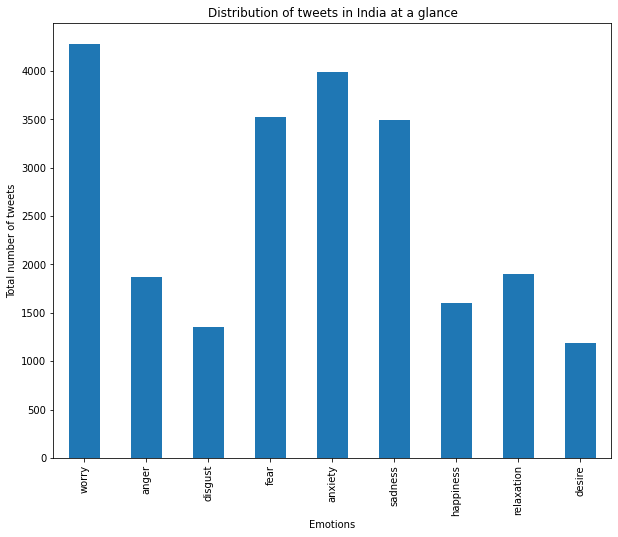

In [8]:
emotion_labels=data_raw[['worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Emotions')
plt.ylabel('Total number of tweets')
plt.title('Distribution of tweets in India at a glance')

emotion_labels.sum(axis=0).plot.bar()
